# Coffee model generation
This notebook handles the model generation for the coffee time series dataset. This notebook uses a random forest from sklearn instead of any of the Deep Learning focused frameworks. Using sklearn instead demonstrates the flexibility of the ONNX format and in extension, of DIANNA. It also results in a relatively small model size on disk. The notebook uses the wget package to download the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Download the datasets.

In [2]:
import wget
train_path = wget.download('https://raw.githubusercontent.com/emanuel-metzenthin/Lime-For-Time/master/demo/data/coffee_train.csv', 'coffee_train.csv')
test_path = wget.download('https://raw.githubusercontent.com/emanuel-metzenthin/Lime-For-Time/master/demo/data/coffee_test.csv', 'coffee_test.csv')

### Load the data
The first column of both datasets contain the labels, while the rest of the columns contain the features.

In [3]:
def load_dataset(dataset_path):
    """Read data set from path and return both features and labels."""
    coffee_train = pd.read_csv(dataset_path, sep=',', header=None).astype(float)
    return coffee_train.loc[:, 1:], coffee_train.loc[:, 0]

coffee_train_x, coffee_train_y = load_dataset(train_path)
coffee_test_x, coffee_test_y = load_dataset(test_path)

### Visualize the data

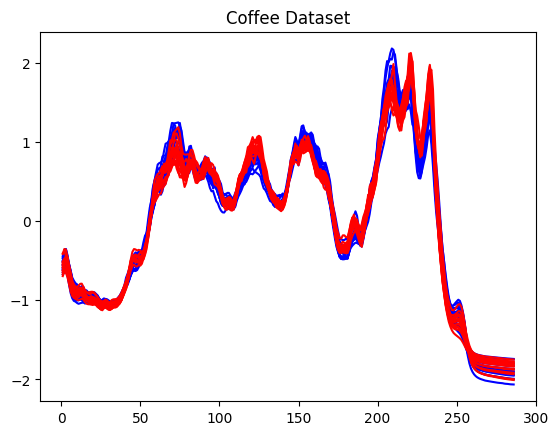

In [4]:
for idx in range(0, len(coffee_train_x)):
    if coffee_train_y[idx] == 0:
        plt.plot(coffee_train_x.loc[idx, :], 'b')
    else:
        plt.plot(coffee_train_x.loc[idx, :], 'r')
plt.title('Coffee Dataset')
plt.show()


### Train a simple model

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc

model = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=0)
model.fit(coffee_train_x, coffee_train_y)

print(f'Accuracy model for coffee train set: {100 * acc(coffee_train_y, model.predict(coffee_train_x))}%')
print(f'Accuracy model for coffee test set: {100 * acc(coffee_test_y, model.predict(coffee_test_x))}%')

Accuracy model for coffee train set: 100.0%
Accuracy model for coffee test set: 100.0%


### Convert to onnx and save

In [6]:
# From http://onnx.ai/sklearn-onnx/
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([None, 4]))]
onx = convert_sklearn(model, initial_types=initial_type)
with open("coffee.onnx", "wb") as f:
    f.write(onx.SerializeToString())